In [1]:
import pandas as pd
import zipfile
import os

# Define the path to the zip file and the extraction directory
zip_file_path = r'C:\Users\yparm\AppData\Local\Temp\dd279a7f-aabe-4b68-b4e8-032ede8dd20a_bank+marketing.zip.20a\bank.zip'
extract_dir = r'C:\Users\yparm\AppData\Local\Temp\dd279a7f-aabe-4b68-b4e8-032ede8dd20a_bank+marketing.zip.20a'

# Create extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
    extracted_files = os.listdir(extract_dir)
    print("Extracted files:", extracted_files)

# Identify the CSV file to load
csv_files = [f for f in extracted_files if f.endswith('.csv')]
print("CSV files found:", csv_files)

csv_file_path = os.path.join(extract_dir, csv_files[0])
print(f"Loading data from: {csv_file_path}")

# Load the data
df = pd.read_csv(csv_file_path, sep=';')
print(df.head())


Extracted files: ['bank-full.csv', 'bank-names.txt', 'bank.csv', 'bank.zip']
CSV files found: ['bank-full.csv', 'bank.csv']
Loading data from: C:\Users\yparm\AppData\Local\Temp\dd279a7f-aabe-4b68-b4e8-032ede8dd20a_bank+marketing.zip.20a\bank-full.csv
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unkno

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values and handle them if necessary
print(df.isnull().sum())

# Convert categorical columns to numerical using Label Encoding
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features and target variable
X = df.drop('y', axis=1)  # 'y' is the target column indicating if the customer subscribed
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
[[11103   863]
 [  849   749]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11966
           1       0.46      0.47      0.47      1598

    accuracy                           0.87     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.87      0.87      0.87     13564



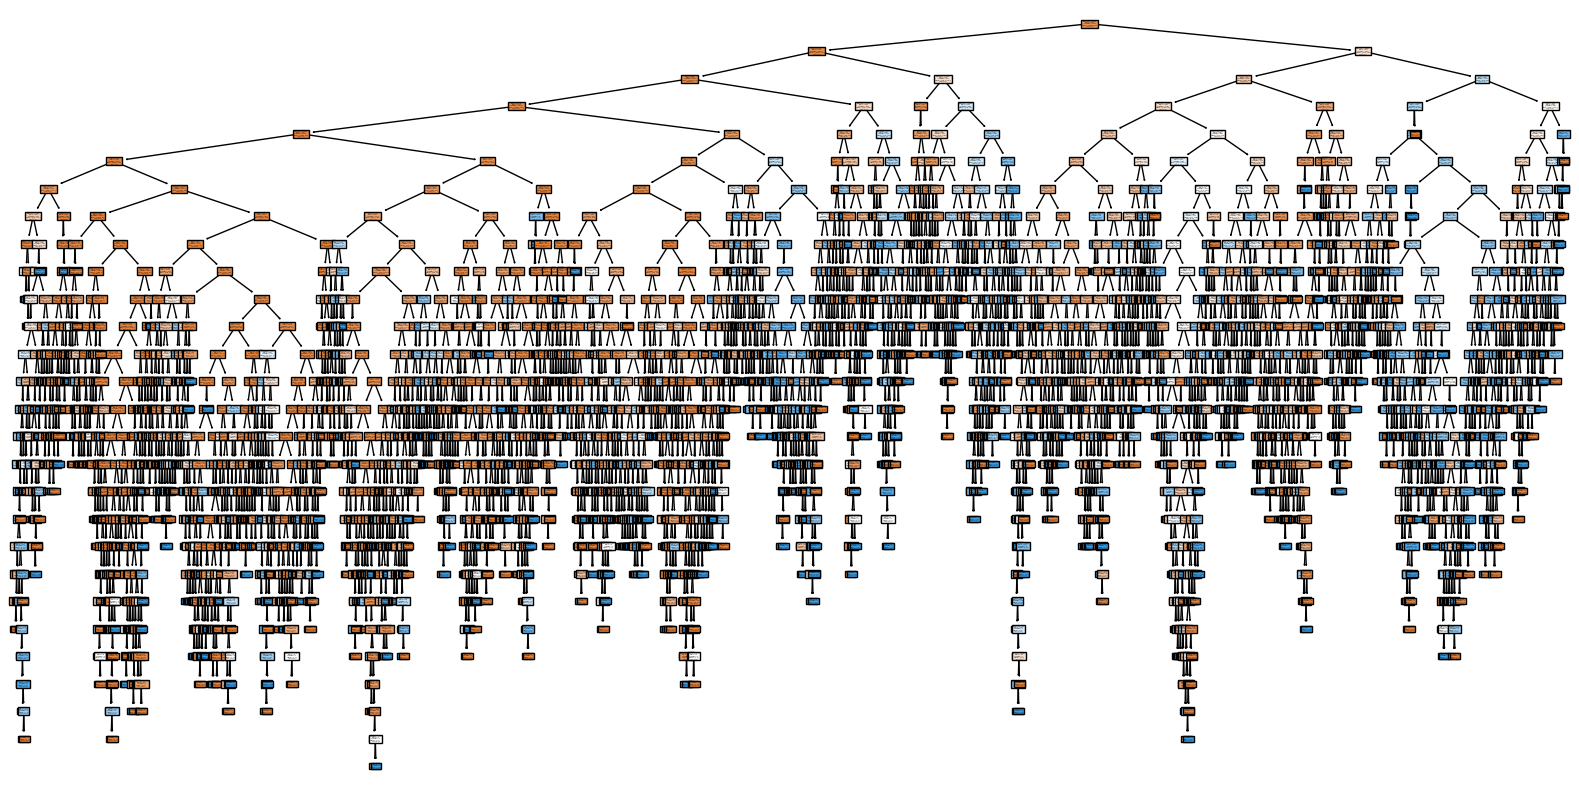

In [6]:
from sklearn import tree

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()
